In [14]:
try:
    passes += 1
except NameError:
    %cd ..
    passes = 1

In [15]:
import pandas as pd

In [16]:

df = pd.read_csv("data/titanic_kaggle.csv")
df_titanic = df.sample(frac=0.75)
df_test = df.loc[df.index.difference(df_titanic),:]
    

In [17]:

from binarybeech.binarybeech import *
import binarybeech.utils as utils


In [18]:

import logging
logging.basicConfig(level=logging.INFO)


In [19]:

rf_titanic = RandomForest(df=df_titanic.copy(),y_name="Survived", cart_settings={"max_depth":4,"min_leaf_samples":2, "min_split_samples":2},sample_frac=0.3,n_attributes=5,metrics_type="classification"
                                 )

In [20]:

rf_titanic.train(20)


A tree with 14 leafs was created
A tree with 15 leafs was created
A tree with 15 leafs was created
A tree with 11 leafs was created
A tree with 14 leafs was created
A tree with 10 leafs was created
A tree with 14 leafs was created
A tree with 13 leafs was created
A tree with 14 leafs was created
A tree with 16 leafs was created
A tree with 13 leafs was created
A tree with 15 leafs was created
A tree with 13 leafs was created
A tree with 12 leafs was created
A tree with 12 leafs was created
A tree with 12 leafs was created
A tree with 14 leafs was created
A tree with 11 leafs was created
A tree with 11 leafs was created
A tree with 6 leafs was created


In [21]:

rf_titanic.validate_oob()


{'precision': array([0.94852941, 0.40384615]),
 'recall': array([0.71402214, 0.83333333]),
 'F-score': 0.6793891464412326,
 'accuracy': 0.7365269461077845}

In [22]:

rf_titanic.validate()


{'precision': array([0.95833333, 0.44230769]),
 'recall': array([0.72947761, 0.87121212]),
 'F-score': 0.7075622621930128,
 'accuracy': 0.7574850299401198}

In [23]:

rf_titanic.variable_importance()


{'Sex': 1.0,
 'Fare': 0.40807174887892395,
 'Age': 0.3901345291479822,
 'Pclass': 0.34529147982062774,
 'PassengerId': 0.21973094170403587,
 'Embarked': 0.14349775784753377,
 'Parch': 0.13901345291479822,
 'SibSp': 0.05829596412556043,
 'Name': 0.0,
 'Ticket': 0.0,
 'Cabin': 0.0}

In [24]:

import binarybeech.utils as bu
bu.print_bars(rf_titanic.variable_importance(),max_width=50)



Sex       |############################### 1.0
Fare      |#############                  0.41
Age       |############                   0.39
Pclass    |###########                    0.35
PassengerId|#######                        0.22
Embarked  |####                           0.14
Parch     |####                           0.14
SibSp     |##                             0.058
Name      |                                0.0
Ticket    |                                0.0
Cabin     |                                0.0


In [25]:

rf_titanic.validate(df_test)


{'precision': array([0.95992714, 0.42690058]),
 'recall': array([0.72890733, 0.86904762]),
 'F-score': 0.7005826859045505,
 'accuracy': 0.755331088664422}

In [26]:

gbt_titanic = GradientBoostedTree(df=df_titanic.copy(),y_name="Survived", cart_settings={"max_depth":2,"min_leaf_samples":10, "min_split_samples":10},sample_frac=0.75,n_attributes=9
                                 )

In [27]:
gbt_titanic.X_names

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [28]:
it=gbt_titanic._initial_tree()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


A tree with 1 leafs was created


In [29]:

utils.print_tree(it.tree)

0.6107784431137725



In [30]:
it.tree.root

In [31]:

gbt_titanic.learning_rate=0.01
#gbt_titanic.create_trees(200)


In [32]:

gbt_titanic.predict(df_titanic.iloc[[0]])

array([0.61077844])

In [33]:

gbt_titanic.validate(df_test)


c:\Users\susanne\git\binarybeech\binarybeech\metrics.py:34: RuntimeWarning: invalid value encountered in true_divide
  return np.diag(m) / np.sum(m, axis=0)


{'precision': array([0., 1.]),
 'recall': array([       nan, 0.38383838]),
 'F-score': nan,
 'accuracy': 0.3838383838383838}

#k-fold cross-validation

In [34]:

c = CART(df=df_titanic,y_name="Survived",metrics_type="classification")


A tree with 104 leafs was created
A tree with 79 leafs was created
A tree with 84 leafs was created
A tree with 96 leafs was created
A tree with 102 leafs was created
A tree with 104 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.004040727893004962


A tree with 104 leafs was created


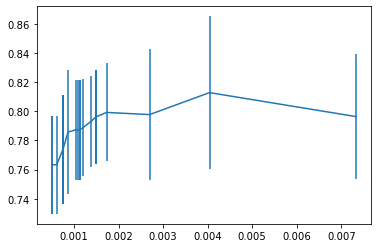

In [35]:
c.train(slack=1e-3)

In [36]:
c.tree.leaf_count()

4

In [37]:
utils.print_tree(c.tree)

Sex in ('female',)
├── False:0
└── True: Pclass<2.24
    ├── False:Fare<23.65
    │   ├── False:0
    │   └── True: 1
    └── True: 1



In [38]:
c.validate(df_test)

{'precision': array([0.89435337, 0.67251462]),
 'recall': array([0.81426202, 0.79861111]),
 'F-score': 0.7912946428571428,
 'accuracy': 0.8092031425364759}